<a href="https://colab.research.google.com/github/tjbingamon/Stroke-Prediction-Dataset/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction 

1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

#1. Source of data

[source link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

#2. Brief description of data

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


#3. What is the target?

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

#4. What does one row represent? (A person?  A business?  An event? A product?)

- a patient


#5. Is this a classification or regression problem?

- classification problem

# 6. How many features does the data have?

- 12 features

# 7. How many rows are in the dataset?

- 5110 rows

#8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

- I believe there may be some outliers among the data. Will have to check each column to see if there are any inconsistencies as well. 


# **Import Libraries/Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

## Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram')  # 'text' or 'diagram'}

import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [ ]:
# Load Data
df = pd.read_csv ('/content/drive/MyDrive/Homework Stuff/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Explore Data**

In [ ]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [ ]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Display shape of data
df.shape[0]

5110

In [ ]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 201


In [ ]:
# percentage of missing data per column
(df.isna().sum()/df.shape[0]) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

- We will not need to use SimpleImputer in our preprocessing steps.

- **Never impute values prior to Train_Test_Split, as it would cause data leakage.**

# Remove Unneccessary Rows

### Duplicates

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

- there are no dupicate rows

### **Inspect Values for Errors**

- Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [ ]:
# Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- There is a "O.O8" in the age column, this may have been an error from the person inputing the data.

# Inconsistent Data (Object)

In [ ]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
# Display Object data types
df.dtypes[df.dtypes == 'object']

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [ ]:
for i in df.dtypes[df.dtypes == 'object'].index:
  print(f'{i} ---')
  print(df[i].value_counts())
  print("")

gender ---
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married ---
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type ---
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type ---
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status ---
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In the "gender" column, we have 1 person as "Other". 

This person may identify themselves as non-binary.

- We can remove 'other' in the 'gender' column and 'Never_worked' in 'work_type' column. They will not help with the prediction of this set. The data is too insignificant and can cause noise among our set.


In [ ]:
df = df[(df['gender'] != 'Other') & (df['work_type'] != 'Never_worked')]
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
# Display the value counts of object data types
object_columns = df.select_dtypes(include='object').columns
for column in object_columns:
    print(df[column].value_counts())

Female    2983
Male      2104
Name: gender, dtype: int64
Yes    3353
No     1734
Name: ever_married, dtype: int64
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64
Urban    2581
Rural    2506
Name: Residence_type, dtype: int64
never smoked       1878
Unknown            1536
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
# Drop NaN values from the 'Category' column
df.dropna(subset=['stroke'], inplace=True)

In [ ]:
# Print the updated DataFrame
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

# **Exploratory Visualizations**

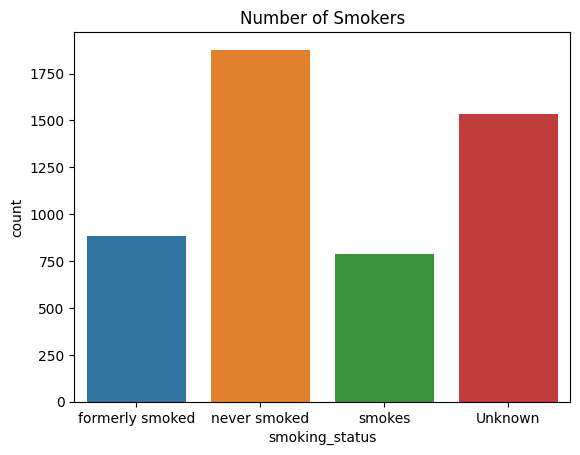

In [ ]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['smoking_status'])
ax.set_title('Number of Smokers');

- The graph shows that are a great number of patients who have never smoked. We can also see that a great number of patients did not disclose their status.

##Heatmap of the correlation between features.

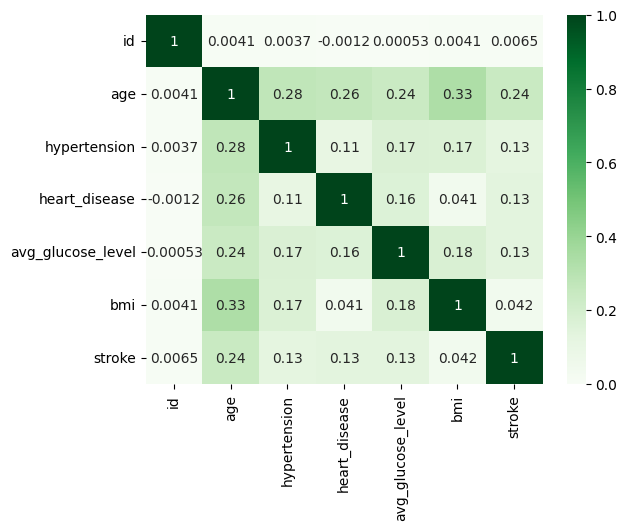

In [ ]:
corr= df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True) ;

- Stroke and BMI have the strongest correlation with 0.42

### What is the correlation between Stroke and BMI?

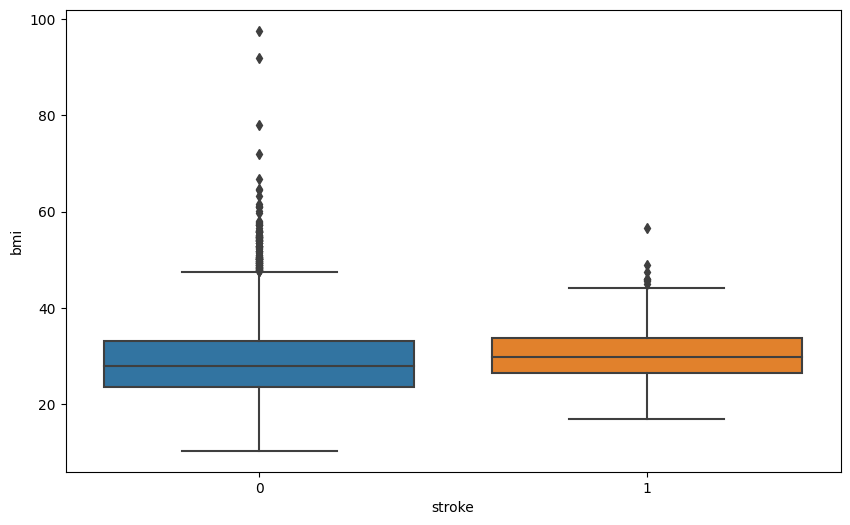

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="stroke", y="bmi", data=df)
ax.set_title('Stroke Vs. BMI')
plt.show()

- Patients in the 0 column with higher BMI had a greater chance of experiencing a stroke.

# Explanatory Visualizations

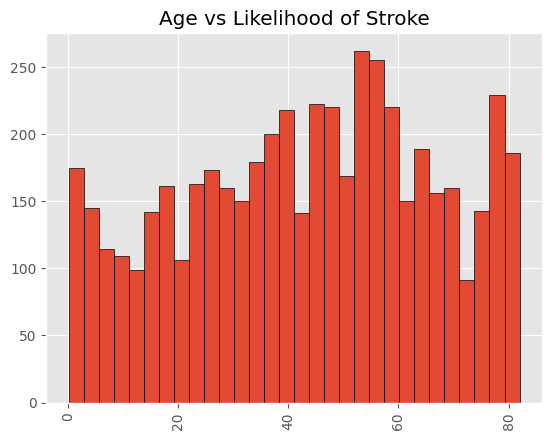

In [ ]:
with plt.style.context('ggplot'):
    # any plots created in this block will use the style
    ax = df['age'].hist(bins = 30, edgecolor='black')
    ax.tick_params(axis='x', rotation = 90)
    ax.set_title('Age vs Likelihood of Stroke')

Patients between the age of 50-80 years old are at greater risk of getting a stroke.

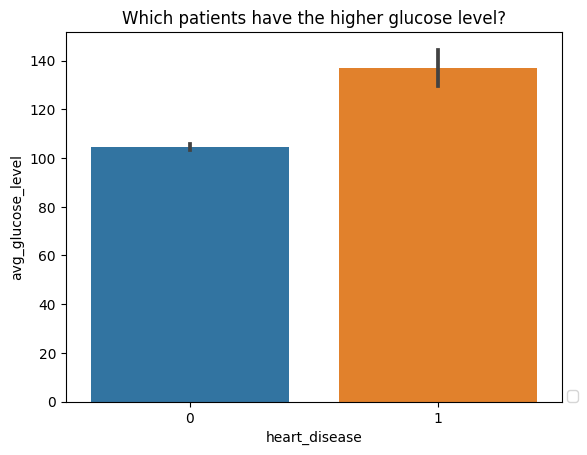

In [ ]:
## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(x= 'heart_disease', y = 'avg_glucose_level', data = df)

## Rotate the tick values
ax.tick_params(rotation = 0)

## Set the Title
ax.set_title('Which patients have the higher glucose level?');
## Note Seaborn automatically sets X and Y axis labels

## Set the Legend location
## Set the Legend location
ax.legend(loc = (1.01, 0));

Patients in the 1 column experience a much higher level of glucose(sugar).

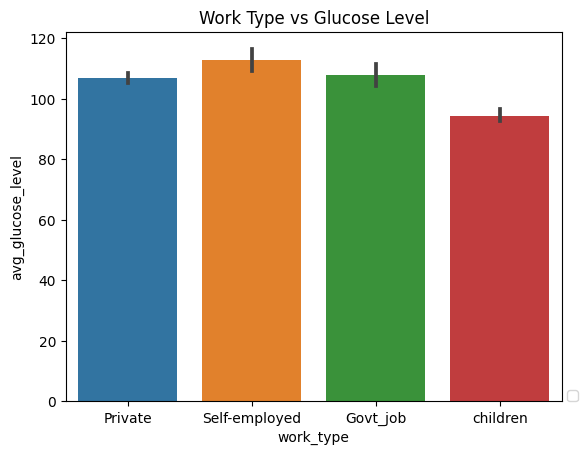

In [ ]:
## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(x= 'work_type', y = 'avg_glucose_level', data = df)

## Rotate the tick values
ax.tick_params(rotation = 0)

## Set the Title
ax.set_title('Work Type vs Glucose Level');
## Note Seaborn automatically sets X and Y axis labels

## Set the Legend location
## Set the Legend location
ax.legend(loc = (1.01, 0));

- Our first three columns show high glucose levels, while children have the lowest.

### Key Insights:

- Patients with higher BMI are more likely to get a stroke. 
- 50-80 is the age group with highest chance of stroke.


# Feature Engineering

In [ ]:
age_bins = [0, 25, 44, float('inf')]
age_labels = ['young_age', 'middle_age', 'old_age']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
print(df['age_group'].value_counts())

old_age       2652
middle_age    1221
young_age     1214
Name: age_group, dtype: int64


In [ ]:
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

In [ ]:
print(df['bmi_category'].value_counts())

obese          1915
overweight     1404
normal         1232
underweight     335
Name: bmi_category, dtype: int64


In [ ]:
df.drop(['age', 'bmi'], axis=1, inplace=True)

### Check for Class Balance

In [ ]:
df['stroke'].value_counts(normalize=False)

0    4838
1     249
Name: stroke, dtype: int64

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951052
1    0.048948
Name: stroke, dtype: float64

- The target 'stroke', is not balanced, so 'stratify=y' will be used with the Train Test split

# Classification Function

In [ ]:
## Create a function to display the classification metrics of a model
def probability_report_matrix(model, X_test, y_test, label='Probability Test Data', 
                             figsize=(15,5), normalize=None,
                             cmap='Greens', thresh=.5): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]
    
    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    print('This code was taken from Coding Dojo Code Along')
    plt.show()

# Preprocess

In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,age_group,bmi_category
0,9046,Male,0,1,Yes,Private,Urban,228.69,formerly smoked,1,old_age,obese
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,old_age,NaN
2,31112,Male,0,1,Yes,Private,Rural,105.92,never smoked,1,old_age,obese
3,60182,Female,0,0,Yes,Private,Urban,171.23,smokes,1,old_age,obese
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,old_age,normal


### Tranformers, Pipelines, Column Selectors

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])

### Split Validation

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951052
1    0.048948
Name: stroke, dtype: float64

- Our target column is imbalanced, we will need to stratify

In [ ]:
X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## KNN

In [ ]:
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3386
           1       0.63      0.07      0.12       174

    accuracy                           0.95      3560
   macro avg       0.79      0.53      0.55      3560
weighted avg       0.94      0.95      0.93      3560

This code was taken from Coding Dojo Code Along


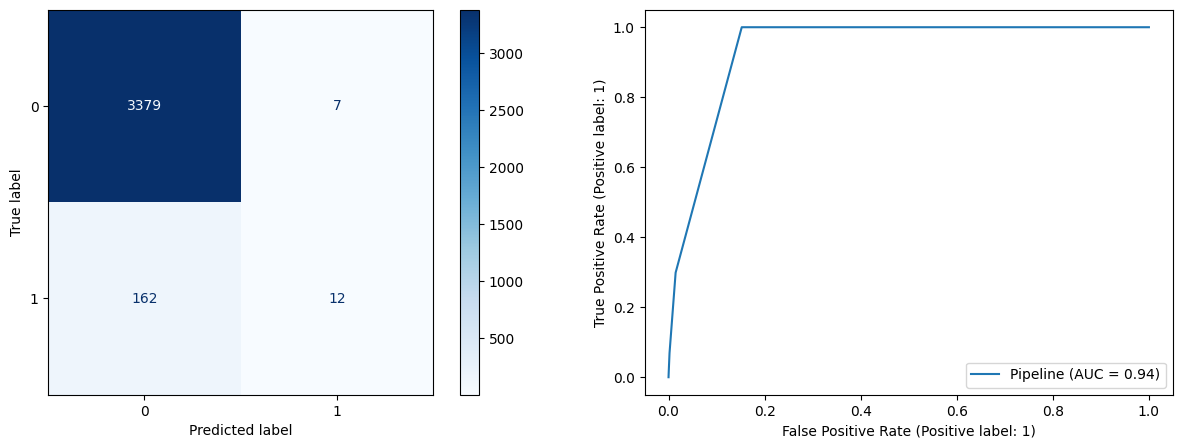

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1452
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1527
   macro avg       0.48      0.50      0.49      1527
weighted avg       0.90      0.95      0.92      1527

This code was taken from Coding Dojo Code Along


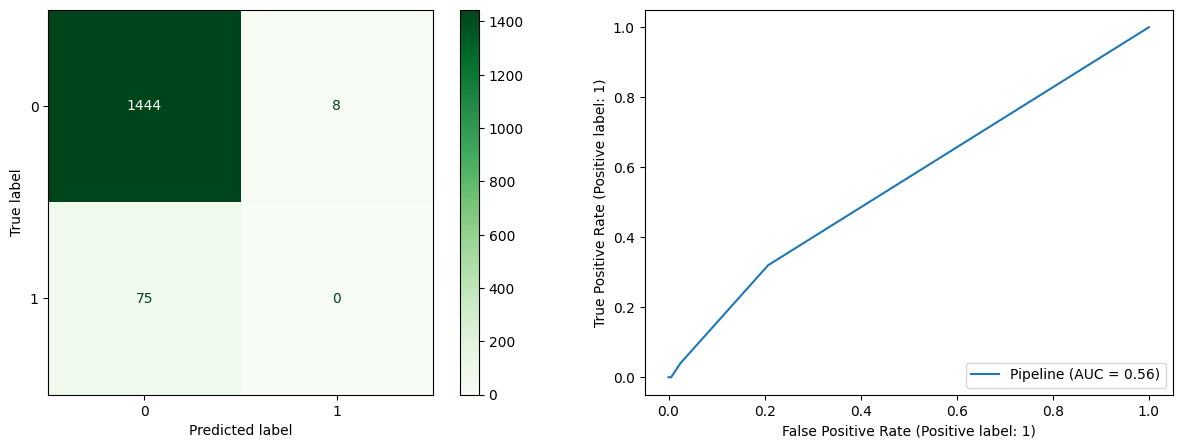

In [ ]:
# Probability Report
probability_report_matrix(knn_pipe, X_train, y_train, label='KNN Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(knn_pipe, X_test, y_test, label='KNN Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.5)

### Tune KNN

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                               

In [ ]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe, param_grid, scoring='f1')
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 3, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.9096267190569745


### Tuned KNN Model

In [ ]:
tuned_knn = KNeighborsClassifier(n_neighbors=1, p=4, weights='distance')
tuned_knn_pipe = make_pipeline(preprocessor, tuned_knn)
tuned_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=1, p=4, weights='distance'))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned KNN Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3560
   macro avg       1.00      1.00      1.00      3560
weighted avg       1.00      1.00      1.00      3560

This code was taken from Coding Dojo Code Along


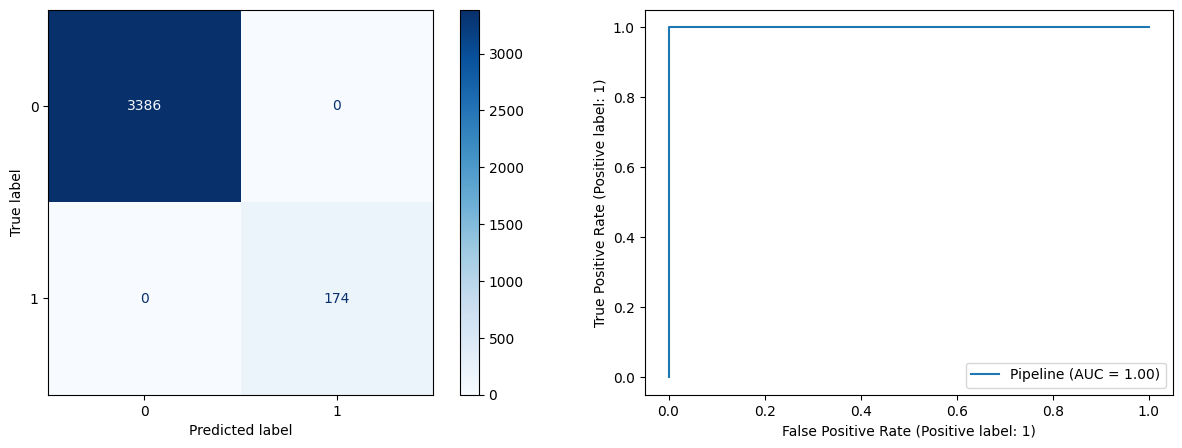

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned KNN Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1452
           1       0.09      0.09      0.09        75

    accuracy                           0.91      1527
   macro avg       0.52      0.52      0.52      1527
weighted avg       0.91      0.91      0.91      1527

This code was taken from Coding Dojo Code Along


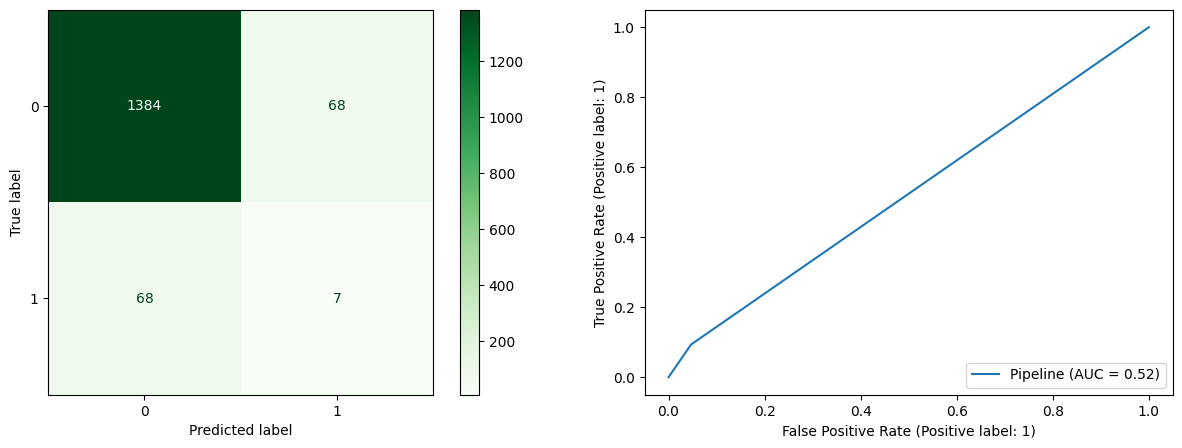

In [ ]:
# Probability Report
probability_report_matrix(tuned_knn_pipe, X_train, y_train, label='Tuned KNN Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_knn_pipe, X_test, y_test, label='Tuned KNN Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.5)

### KNN & SMOTE

In [ ]:
smote = SMOTE()
knn_smote = KNeighborsClassifier()
knn_smote_pipe = make_sampler_pipeline(preprocessor, smote, knn_smote)
#Fit and evaluate the model pipeline
knn_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: SMOTE KNN Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      3386
           1       0.33      0.98      0.49       174

    accuracy                           0.90      3560
   macro avg       0.66      0.94      0.72      3560
weighted avg       0.97      0.90      0.92      3560

This code was taken from Coding Dojo Code Along


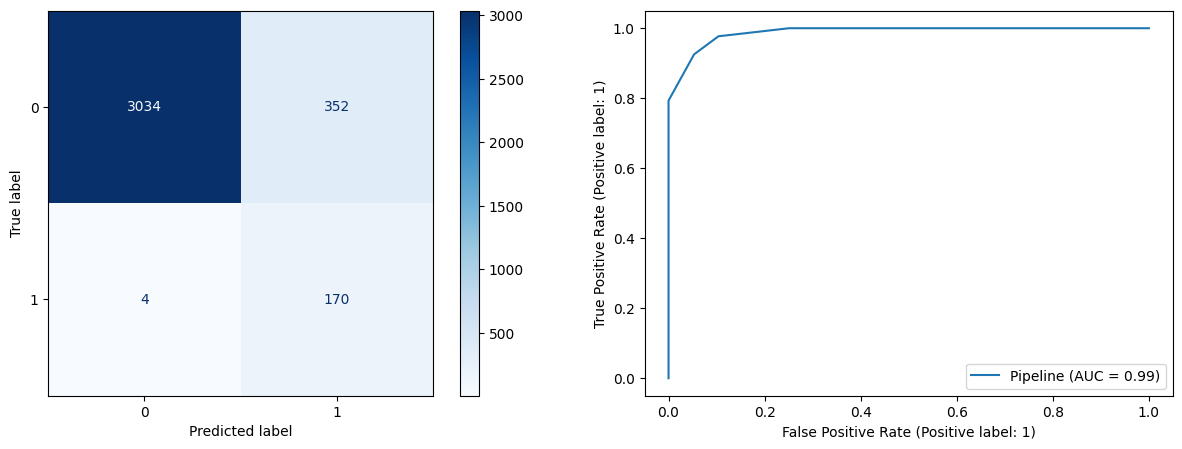

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: SMOTE KNN Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1452
           1       0.08      0.37      0.13        75

    accuracy                           0.75      1527
   macro avg       0.52      0.57      0.49      1527
weighted avg       0.92      0.75      0.82      1527

This code was taken from Coding Dojo Code Along


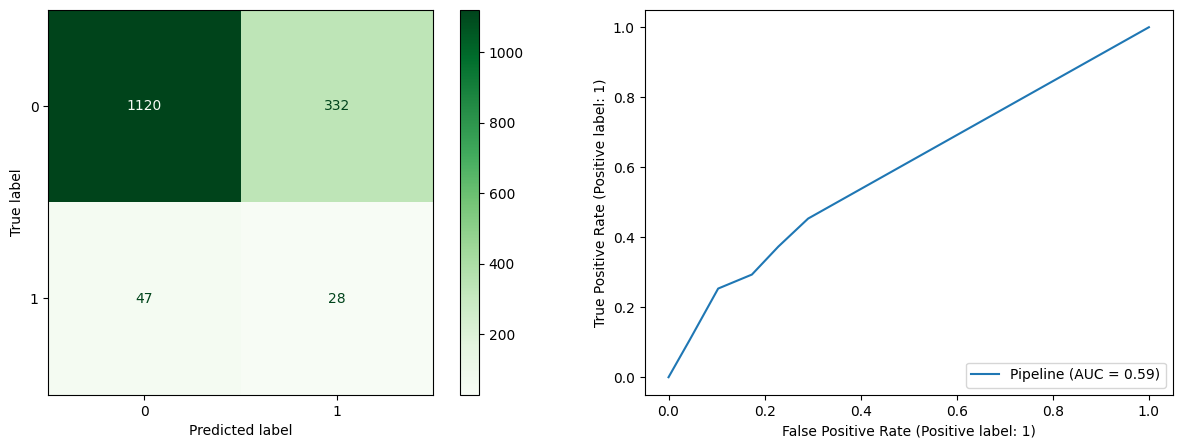

In [ ]:
# Probability Report
probability_report_matrix(knn_smote_pipe, X_train, y_train, label='SMOTE KNN Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(knn_smote_pipe, X_test, y_test, label='SMOTE KNN Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### SMOTE & KNN tuned

In [ ]:
knn_smote_pipe_gs = GridSearchCV(knn_smote_pipe, param_grid, scoring='f1')
 
knn_smote_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_smote_pipe_gs.best_params_)
best_smote_pipe = knn_smote_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_smote_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.8605108055009824


In [ ]:
tuned_knn_smote = KNeighborsClassifier(n_neighbors=3, p=3, weights='uniform')
tuned_knn_smote_pipe = make_sampler_pipeline(preprocessor, smote, tuned_knn_smote)
#Fit and evaluate the model pipeline
tuned_knn_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, p=3))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE KNN Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3386
           1       0.36      0.99      0.53       174

    accuracy                           0.91      3560
   macro avg       0.68      0.95      0.74      3560
weighted avg       0.97      0.91      0.93      3560

This code was taken from Coding Dojo Code Along


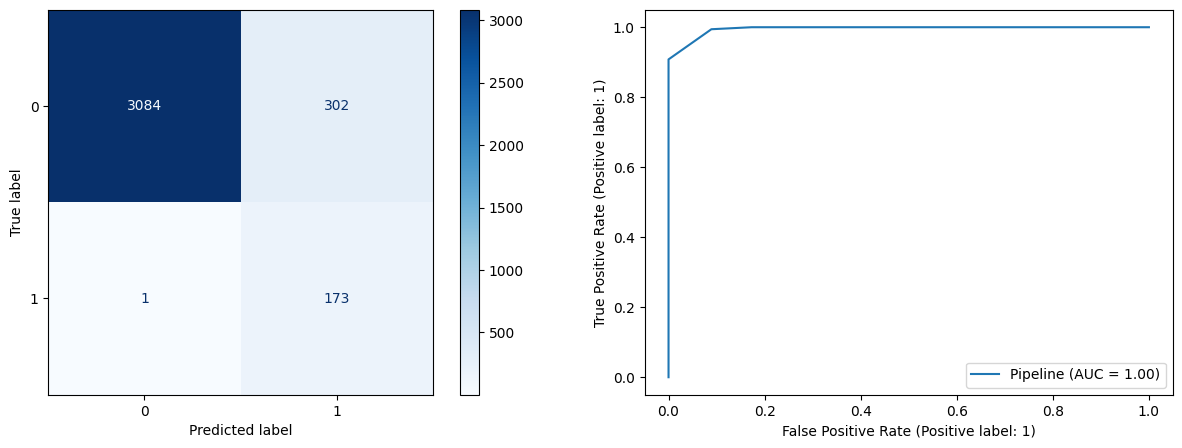

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE KNN Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1452
           1       0.07      0.36      0.12        75

    accuracy                           0.75      1527
   macro avg       0.52      0.56      0.49      1527
weighted avg       0.92      0.75      0.82      1527

This code was taken from Coding Dojo Code Along


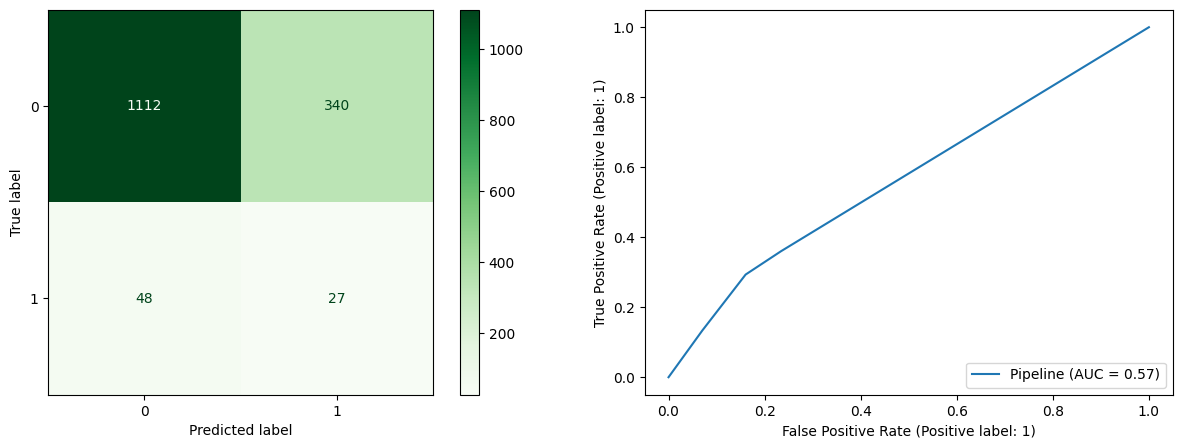

In [ ]:
# Probability Report
probability_report_matrix(tuned_knn_smote_pipe, X_train, y_train, label='Tuned SMOTE KNN Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_knn_smote_pipe, X_test, y_test, label='Tuned SMOTE KNN Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

- The SMOTE KNN appears the best one for KNN

## Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3560
   macro avg       1.00      1.00      1.00      3560
weighted avg       1.00      1.00      1.00      3560

This code was taken from Coding Dojo Code Along


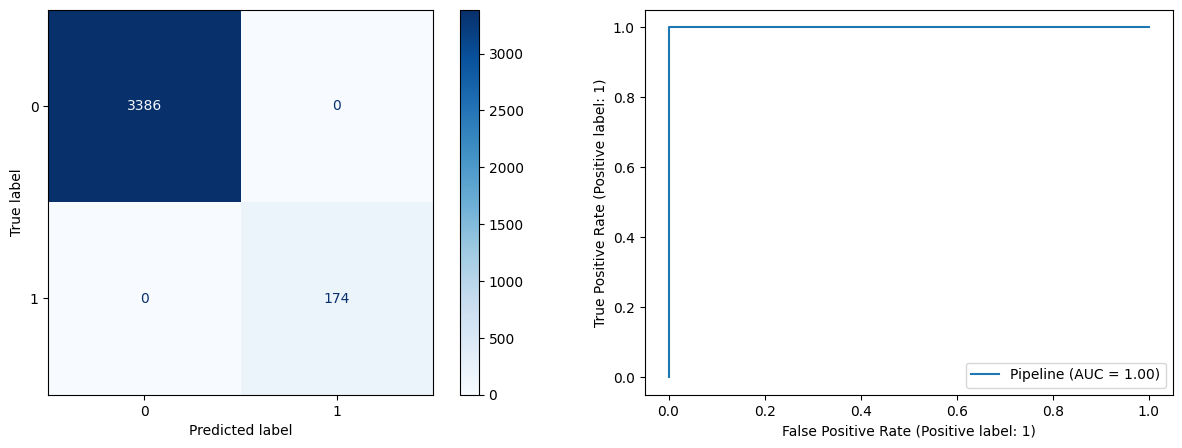

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1527
   macro avg       0.48      0.50      0.49      1527
weighted avg       0.90      0.95      0.92      1527

This code was taken from Coding Dojo Code Along


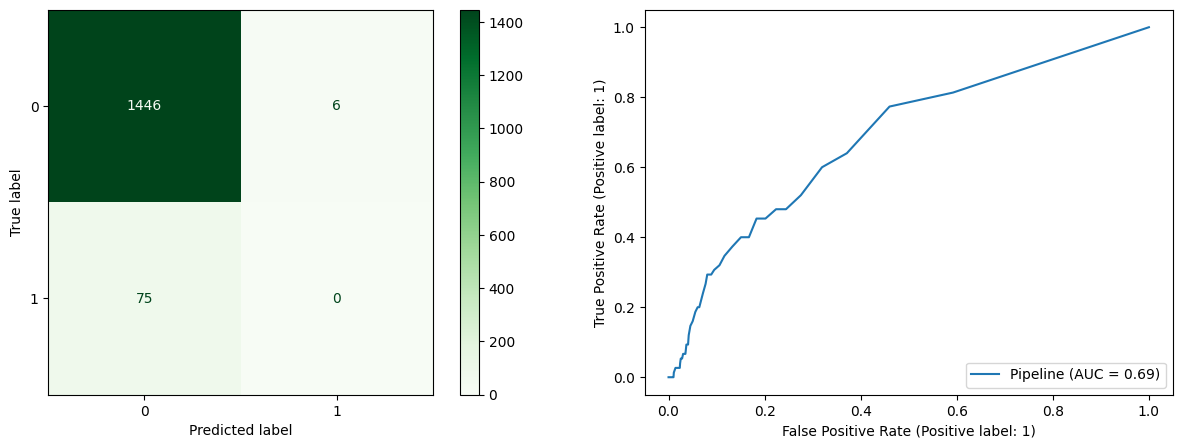

In [ ]:
probability_report_matrix(rf_pipe, X_train, y_train, label='Random Forest Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(rf_pipe, X_test, y_test, label='Random Forest Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.5)

### Tune Random Forest

In [ ]:
# get parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
            

In [ ]:
# set parameters
rf_params = {'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample'],
            'randomforestclassifier__max_depth': [None, 5, 10, 15],
            'randomforestclassifier__n_estimators': [50, 100, 150, 200]}

In [ ]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_params, scoring='f1')
 
rf_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(rf_pipe_gs.best_params_)
best_rf_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best Random Forest model is: {best_rf_pipe.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 50}
Accuracy of best Random Forest model is: 0.7603143418467584


## Random Forest Tuned

In [ ]:
tuned_rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=5, n_estimators=200, random_state=42)

tuned_rf_pipe = make_pipeline(preprocessor, tuned_rf)
tuned_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5, n_estimators=200,
                                        random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned Random Forest Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3386
           1       0.15      0.72      0.25       174

    accuracy                           0.79      3560
   macro avg       0.57      0.76      0.56      3560
weighted avg       0.94      0.79      0.85      3560

This code was taken from Coding Dojo Code Along


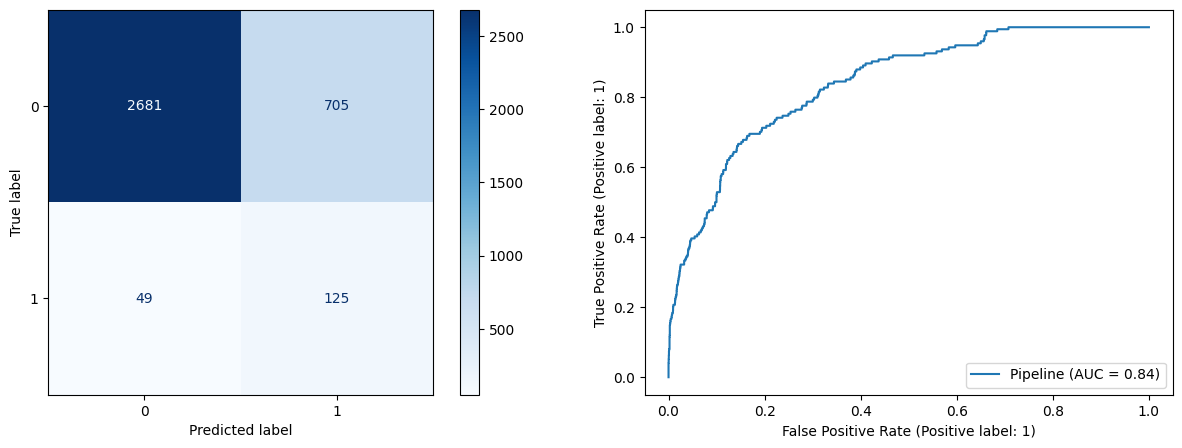

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned Random Forest Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.34      0.50      1452
           1       0.07      0.91      0.12        75

    accuracy                           0.37      1527
   macro avg       0.53      0.62      0.31      1527
weighted avg       0.94      0.37      0.48      1527

This code was taken from Coding Dojo Code Along


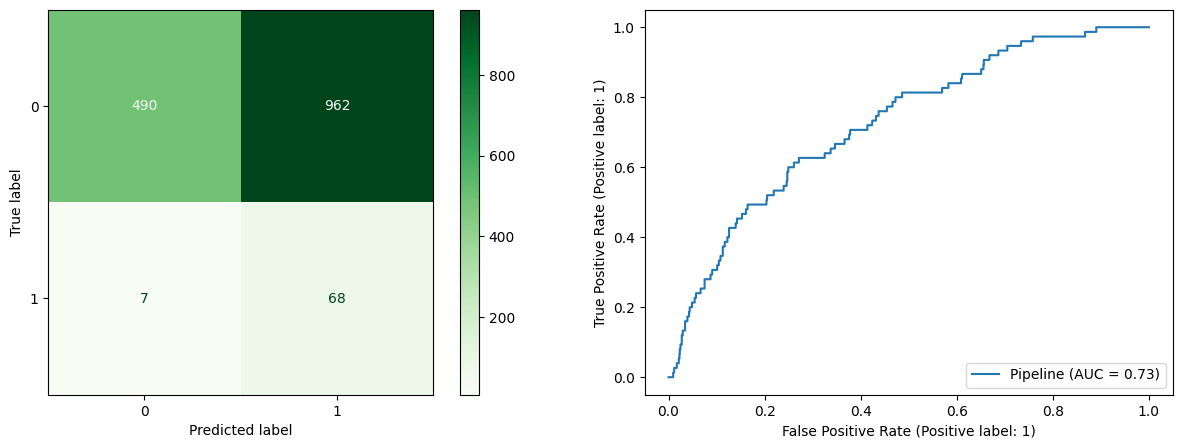

In [ ]:
probability_report_matrix(tuned_rf_pipe, X_train, y_train, label='Tuned Random Forest Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_rf_pipe, X_test, y_test, label='Tuned Random Forest Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### SMOTE & Random Forest

In [ ]:
smote = SMOTE()
rf_smote = RandomForestClassifier(random_state=42)
rf_smote_pipe = make_sampler_pipeline(preprocessor, smote, rf_smote)
#Fit and evaluate the model pipeline
rf_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Probability Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3560
   macro avg       1.00      1.00      1.00      3560
weighted avg       1.00      1.00      1.00      3560

This code was taken from Coding Dojo Code Along


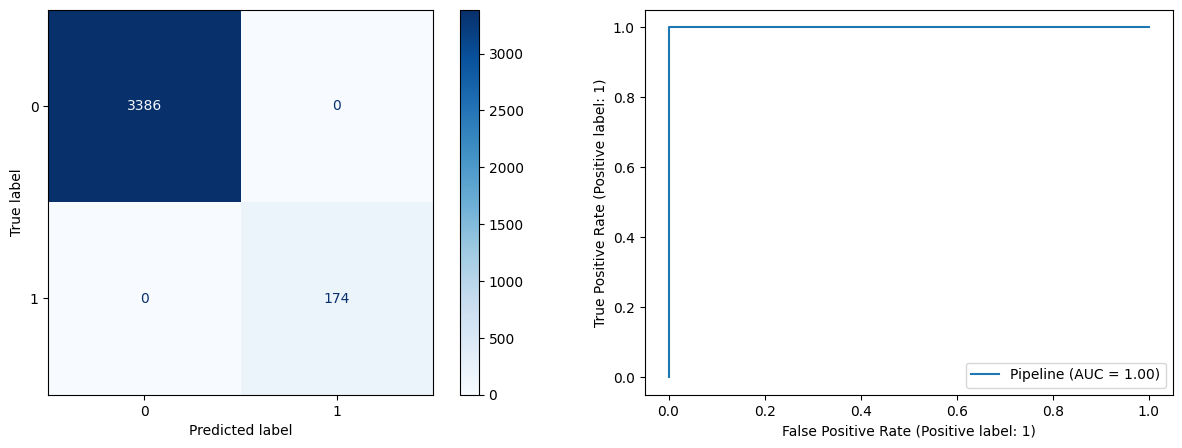

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Probability Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1452
           1       0.07      0.09      0.08        75

    accuracy                           0.89      1527
   macro avg       0.51      0.51      0.51      1527
weighted avg       0.91      0.89      0.90      1527

This code was taken from Coding Dojo Code Along


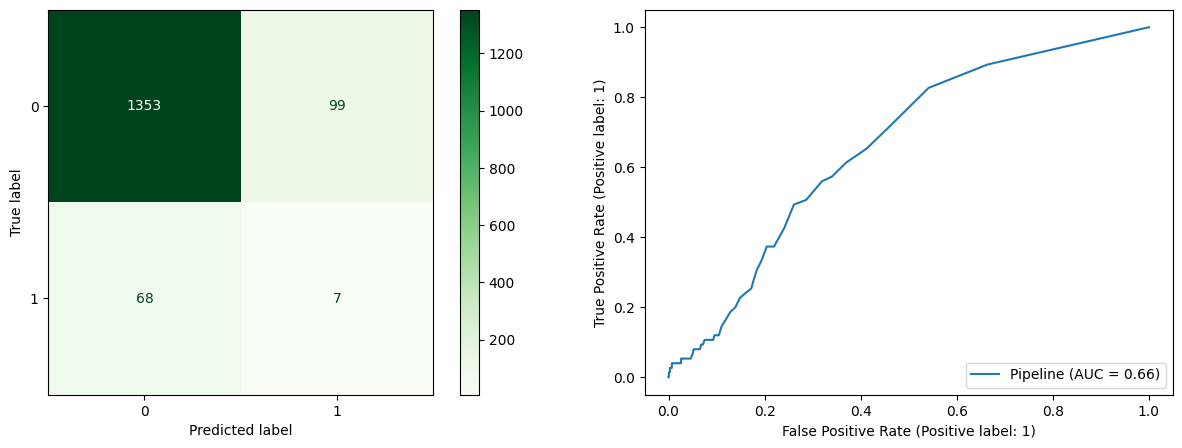

In [ ]:
# Probability Report
probability_report_matrix(rf_smote_pipe, X_train, y_train, label='Probability Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(rf_smote_pipe, X_test, y_test, label='Probability Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### Tuned SMOTE & Random Forest

In [ ]:
rf_smote_pipe_gs = GridSearchCV(rf_smote_pipe, rf_params, scoring='f1')
 
rf_smote_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(rf_smote_pipe_gs.best_params_)
best_rf_smote_pipe = rf_smote_pipe_gs.best_estimator_
print(f'Accuracy of best Random Forest model is: {best_rf_smote_pipe.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 150}
Accuracy of best Random Forest model is: 0.7485265225933202


In [ ]:
tuned_rf_smote = RandomForestClassifier(class_weight=None, max_depth=10, n_estimators=50, random_state=42)

tuned_rf_smote_pipe = make_sampler_pipeline(preprocessor, smote, tuned_rf_smote)
#Fit and evaluate the model pipeline
tuned_rf_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE Random Forest Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3386
           1       0.48      0.54      0.51       174

    accuracy                           0.95      3560
   macro avg       0.73      0.76      0.74      3560
weighted avg       0.95      0.95      0.95      3560

This code was taken from Coding Dojo Code Along


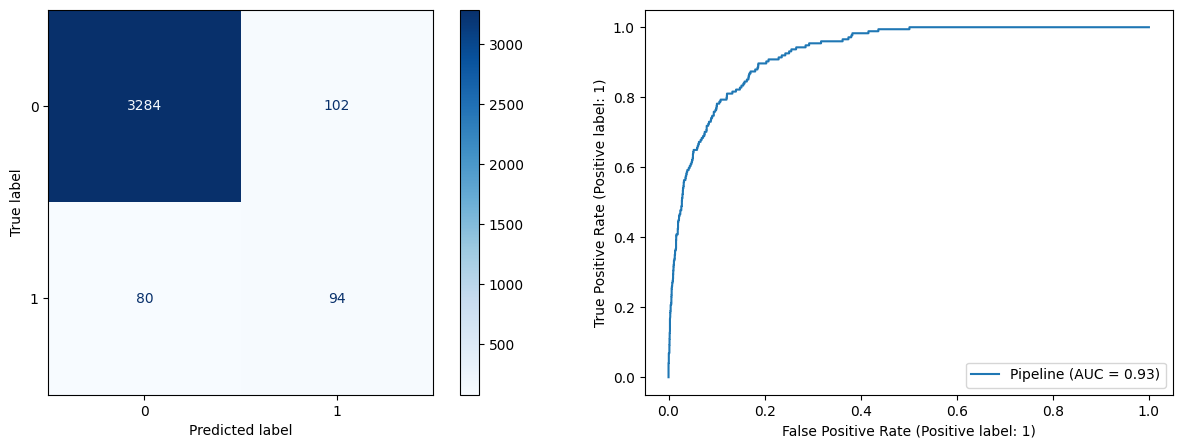

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE Random Forest Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1452
           1       0.09      0.51      0.15        75

    accuracy                           0.72      1527
   macro avg       0.53      0.62      0.49      1527
weighted avg       0.92      0.72      0.80      1527

This code was taken from Coding Dojo Code Along


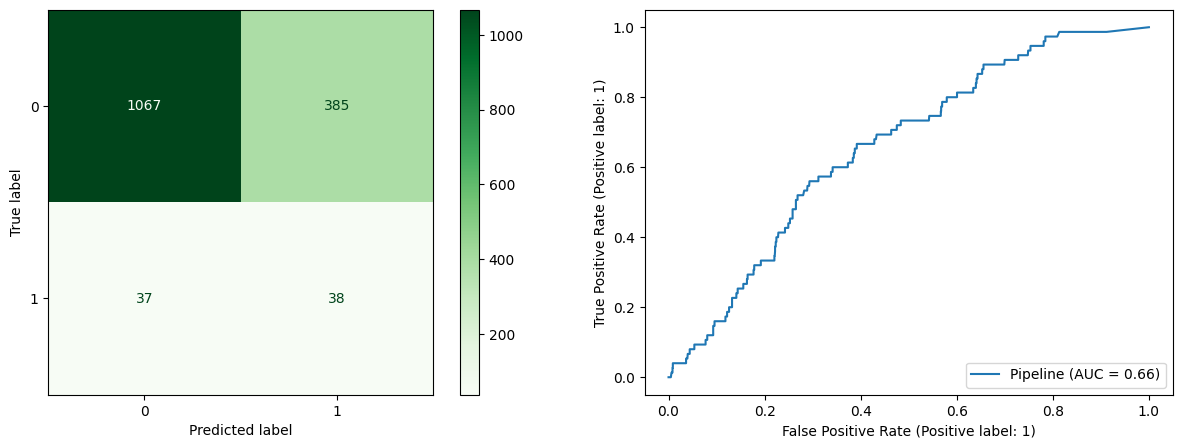

In [ ]:
probability_report_matrix(tuned_rf_smote_pipe, X_train, y_train, label='Tuned SMOTE Random Forest Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_rf_smote_pipe, X_test, y_test, label='Tuned SMOTE Random Forest Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

## Logistic Regression Model

In [ ]:
#create an instance of the model
logreg= LogisticRegression(random_state=42)
#create the pipeline
log_reg_pipe = make_pipeline(preprocessor, logreg)
#Fit on training data
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Probability Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3386
           1       0.00      0.00      0.00       174

    accuracy                           0.95      3560
   macro avg       0.48      0.50      0.49      3560
weighted avg       0.90      0.95      0.93      3560

This code was taken from Coding Dojo Code Along


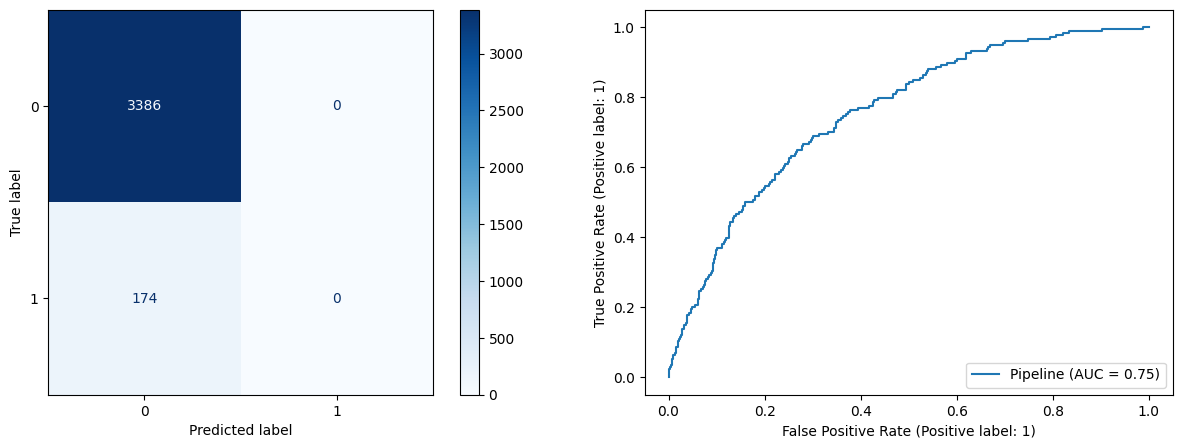

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Probability Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1452
           1       0.23      0.04      0.07        75

    accuracy                           0.95      1527
   macro avg       0.59      0.52      0.52      1527
weighted avg       0.92      0.95      0.93      1527

This code was taken from Coding Dojo Code Along


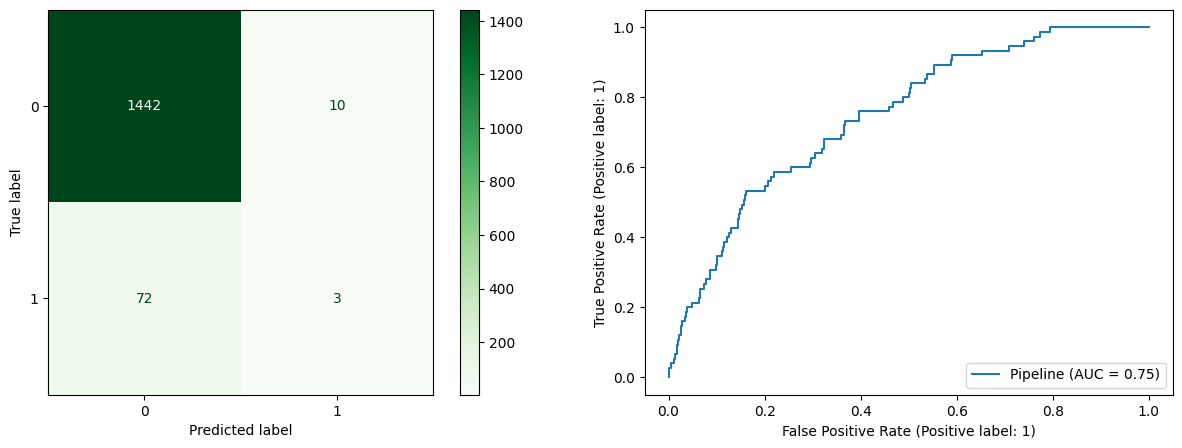

In [ ]:
probability_report_matrix(log_reg_pipe, X_train, y_train, label='Probability Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(log_reg_pipe, X_test, y_test, label='Probability Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### Tune Logistic Regression Model

In [ ]:
log_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                    

In [ ]:
log_reg_gs = LogisticRegression(random_state=42, solver='liblinear')

# Define the parameter grid
param_grid = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__class_weight': ['balanced']}

In [ ]:
log_reg_gs = GridSearchCV(log_reg_pipe, param_grid, scoring='f1')
 
log_reg_gs.fit(X_train, y_train)
print('Best LogReg Parameters:')
print(log_reg_gs.best_params_)
best_xgb_pipe = log_reg_gs.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {log_reg_pipe.score(X_test, y_test)}')

Best LogReg Parameters:
{'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2'}
Accuracy of best Logistic Regression model is: 0.9508840864440079


# Tune Logistic Regression Model

In [ ]:
tuned_log_reg_gs = LogisticRegression(random_state=42, solver='liblinear')

tuned_log_reg_pipe = make_pipeline(preprocessor, tuned_log_reg_gs)
tuned_log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('logisticregression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned LogReg Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3386
           1       0.00      0.00      0.00       174

    accuracy                           0.95      3560
   macro avg       0.48      0.50      0.49      3560
weighted avg       0.90      0.95      0.93      3560

This code was taken from Coding Dojo Code Along


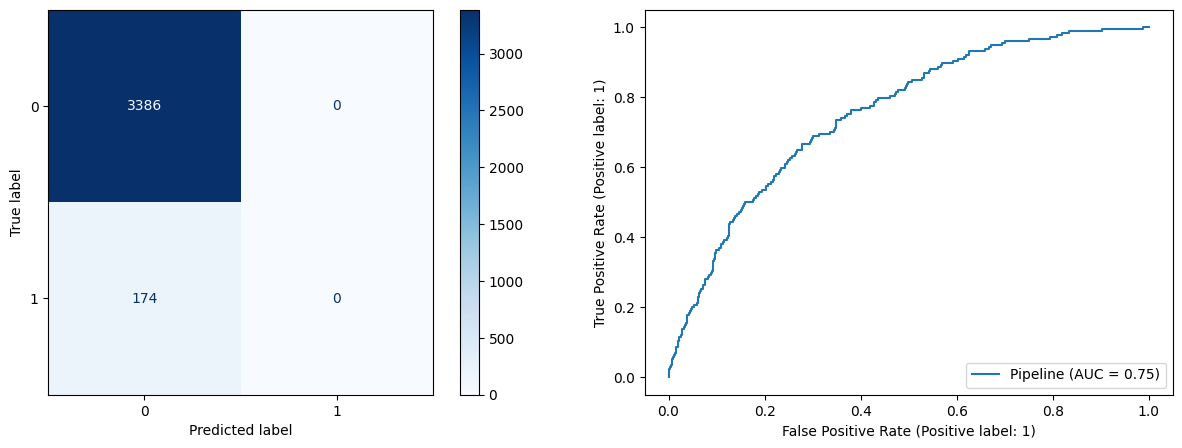

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned LogReg Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1452
           1       0.23      0.04      0.07        75

    accuracy                           0.95      1527
   macro avg       0.59      0.52      0.52      1527
weighted avg       0.92      0.95      0.93      1527

This code was taken from Coding Dojo Code Along


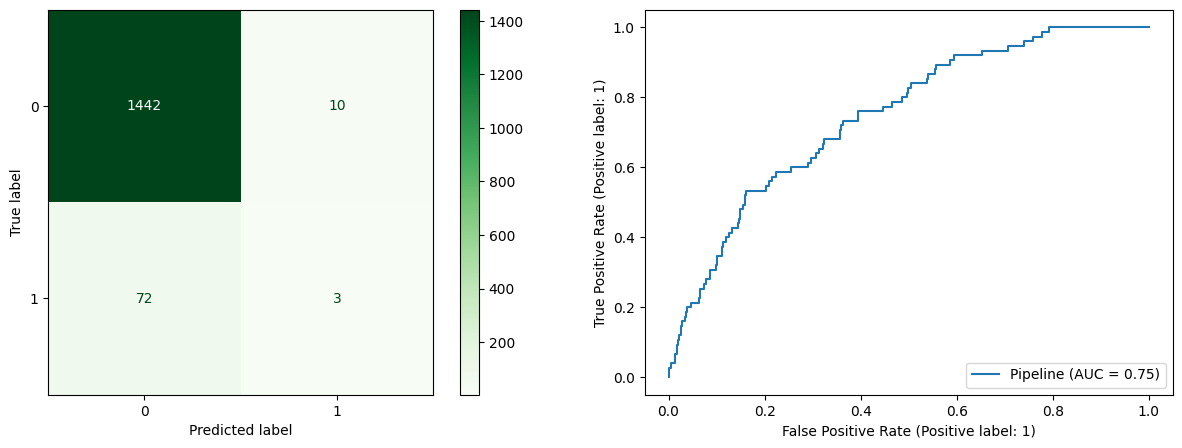

In [ ]:
probability_report_matrix(tuned_log_reg_pipe, X_train, y_train, label='Tuned LogReg Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_log_reg_pipe, X_test, y_test, label='Tuned LogReg Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### SMOTE Logistic Regression

In [ ]:
smote = SMOTE()
logreg_smote = LogisticRegression(random_state=42)
logregsmote_pipe = make_sampler_pipeline(preprocessor, smote, logreg_smote)
#Fit and evaluate the model pipeline
logregsmote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: SMOTE XGBoost Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      3386
           1       0.10      0.70      0.18       174

    accuracy                           0.69      3560
   macro avg       0.54      0.69      0.49      3560
weighted avg       0.94      0.69      0.78      3560

This code was taken from Coding Dojo Code Along


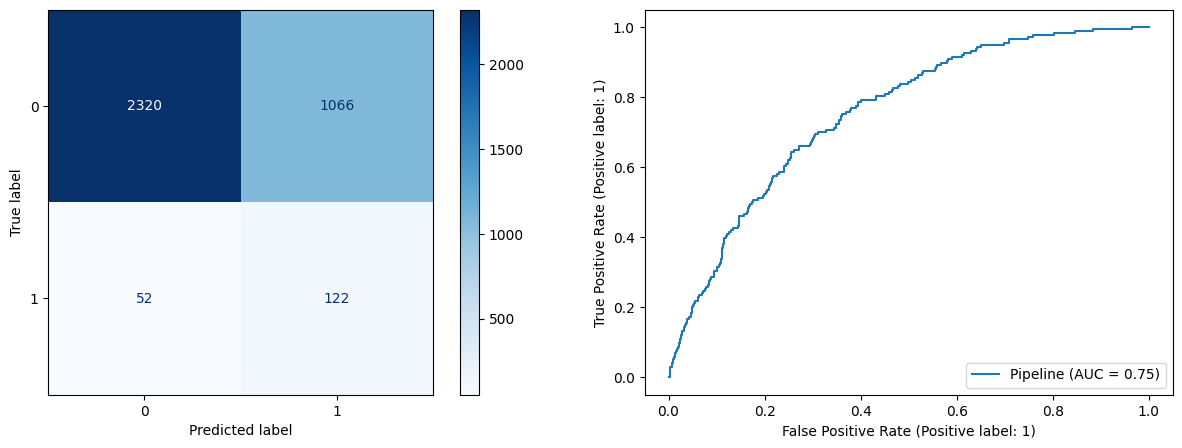

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: SMOTE XGBoost Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.33      0.49      1452
           1       0.07      0.93      0.12        75

    accuracy                           0.36      1527
   macro avg       0.53      0.63      0.31      1527
weighted avg       0.94      0.36      0.47      1527

This code was taken from Coding Dojo Code Along


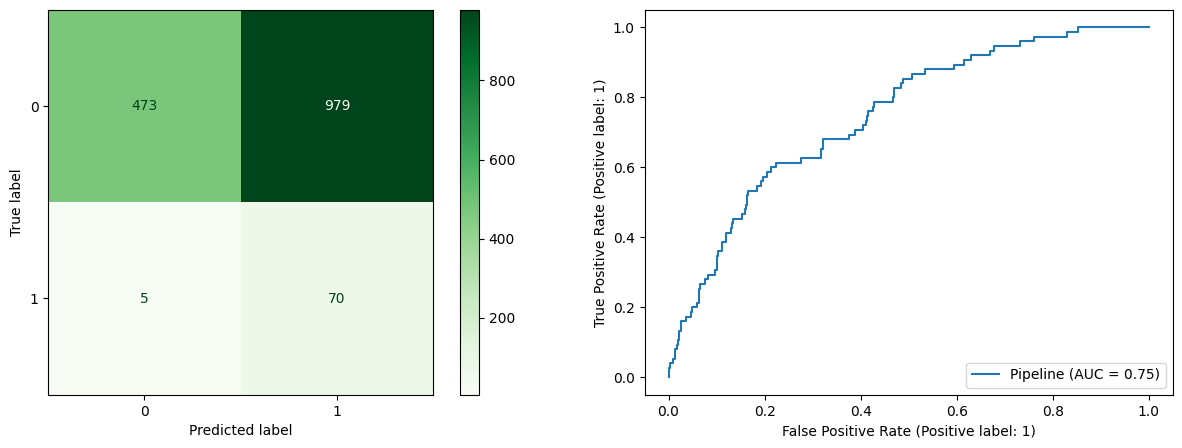

In [ ]:
# Probability Report
probability_report_matrix(logregsmote_pipe, X_train, y_train, label='SMOTE XGBoost Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(logregsmote_pipe, X_test, y_test, label='SMOTE XGBoost Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

### Tuned SMOTE Logistic Regression

In [ ]:
# Define the parameter grid
log_reg_param = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__class_weight': ['balanced']}

In [ ]:
logregsmote_pipe_gs = GridSearchCV(logregsmote_pipe, log_reg_param, scoring='roc_auc')
 
logregsmote_pipe_gs.fit(X_train, y_train)
print('Best LogReg Parameters:')
print(logregsmote_pipe_gs.best_params_)
best_xgb_smote_pipe = logregsmote_pipe_gs.best_estimator_
print(f'Accuracy of best LogReg model is: {best_xgb_smote_pipe.score(X_test, y_test)}')

Best LogReg Parameters:
{'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2'}
Accuracy of best LogReg model is: 0.7550753110674525


In [ ]:
tuned_smote_logreg = LogisticRegression(random_state=42)
tuned_smote_logregpipe = make_sampler_pipeline(preprocessor, smote, tuned_smote_logreg)
tuned_smote_logregpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE LogReg Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      3386
           1       0.10      0.71      0.17       174

    accuracy                           0.67      3560
   macro avg       0.54      0.69      0.48      3560
weighted avg       0.94      0.67      0.76      3560

This code was taken from Coding Dojo Code Along


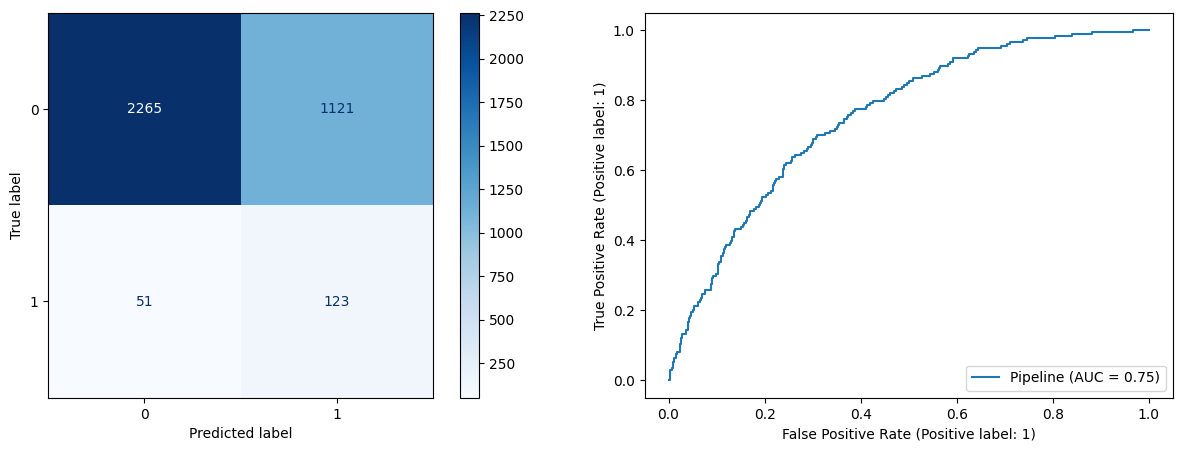

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Tuned SMOTE LogReg Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.33      0.49      1452
           1       0.07      0.93      0.13        75

    accuracy                           0.36      1527
   macro avg       0.53      0.63      0.31      1527
weighted avg       0.94      0.36      0.48      1527

This code was taken from Coding Dojo Code Along


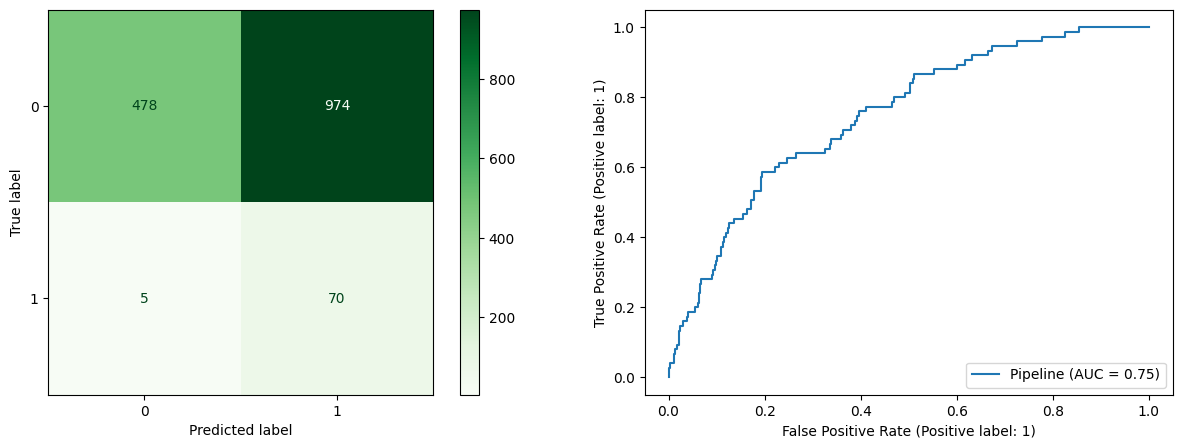

In [ ]:
probability_report_matrix(tuned_smote_logregpipe, X_train, y_train, label='Tuned SMOTE LogReg Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_smote_logregpipe, X_test, y_test, label='Tuned SMOTE LogReg Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

## Best Model Summary

- The best model was the Tuned Random Forest with 
no SMOTE tuning
    - I used class balance because there was a significant amount unbalanced.
 
    - In this instance it is better to have more positive results. False negatives in this test are dire to a patient's health and mortality. Although we will have more false positives, it is still better than a false negative.

## Feature Engineering

- Will bin 'avg_glucose_level'

In [ ]:
df2 = df.copy()
df2.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,age_group,bmi_category
0,9046,Male,0,1,Yes,Private,Urban,228.69,formerly smoked,1,old_age,obese
1,51676,Female,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,old_age,NaN
2,31112,Male,0,1,Yes,Private,Rural,105.92,never smoked,1,old_age,obese
3,60182,Female,0,0,Yes,Private,Urban,171.23,smokes,1,old_age,obese
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,old_age,normal


In [ ]:
df2['avg_glucose_level'].describe()

count    5087.000000
mean      106.184069
std        45.340478
min        55.120000
25%        77.235000
50%        91.890000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
def bin_glucose(glucose):
    if 69 <= glucose < 81:
        return 'low'
    if 81 <= glucose < 104:
        return 'medium'
    else:
        return 'high'

In [ ]:
df2['avg_glucose_level'] = df2['avg_glucose_level'].apply(bin_glucose)
df2.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,age_group,bmi_category
0,9046,Male,0,1,Yes,Private,Urban,high,formerly smoked,1,old_age,obese
1,51676,Female,0,0,Yes,Self-employed,Rural,high,never smoked,1,old_age,NaN
2,31112,Male,0,1,Yes,Private,Rural,high,never smoked,1,old_age,obese
3,60182,Female,0,0,Yes,Private,Urban,high,smokes,1,old_age,obese
4,1665,Female,1,0,Yes,Self-employed,Rural,high,never smoked,1,old_age,normal


## PCA

In [ ]:
X2 = df2.drop(columns='stroke')
y2 = df2['stroke']

In [ ]:
X2.shape

(5087, 11)

In [ ]:
processed_df2 = preprocessor.fit_transform(X2)
processed_df2.shape

(5087, 20)

In [ ]:
processed_df2.shape[1]

20

In [ ]:
pca = PCA()
pca.fit(processed_df2)

PCA()

### Scree Plot

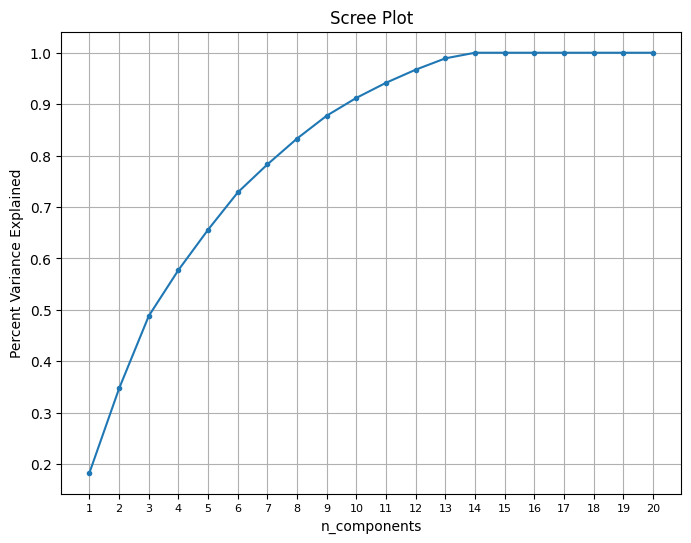

In [ ]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.

fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(range(1, (processed_df2.shape[1] + 1)), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,(processed_df2.shape[1] + 1)), fontsize=8)

plt.xlabel('n_components')
plt.ylabel('Percent Variance Explained')
plt.title('Scree Plot')

plt.grid();

- From the Scree Plot, we can see that the plot isn't linear
    - Which means that at a certain point, before max n_components, we'll reach 100% variance explained
- We can also see that 100% variance explained is reached at 17 n_components, which is a reduction of 37% of n_components/features

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y, test_size=0.3, random_state=42)
pca17 = PCA(n_components=17)

PCA w/ Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf_pca_pipe = make_pipeline(preprocessor, pca17, rf)
rf_pca_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('pca', PCA(n_components=17)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: PCA Random Forest Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3560
   macro avg       1.00      1.00      1.00      3560
weighted avg       1.00      1.00      1.00      3560

This code was taken from Coding Dojo Code Along


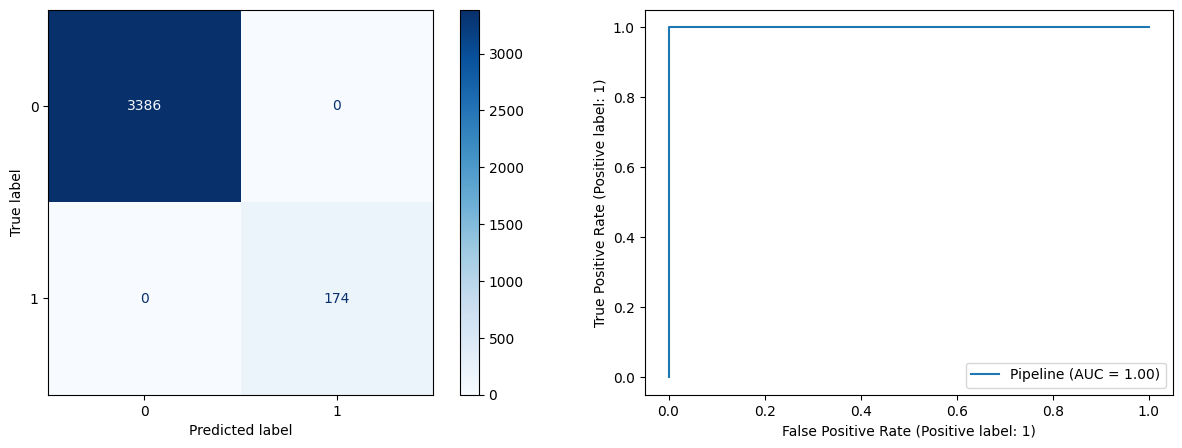

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: PCA Random Forest Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1452
           1       0.10      0.09      0.09        75

    accuracy                           0.91      1527
   macro avg       0.52      0.52      0.52      1527
weighted avg       0.91      0.91      0.91      1527

This code was taken from Coding Dojo Code Along


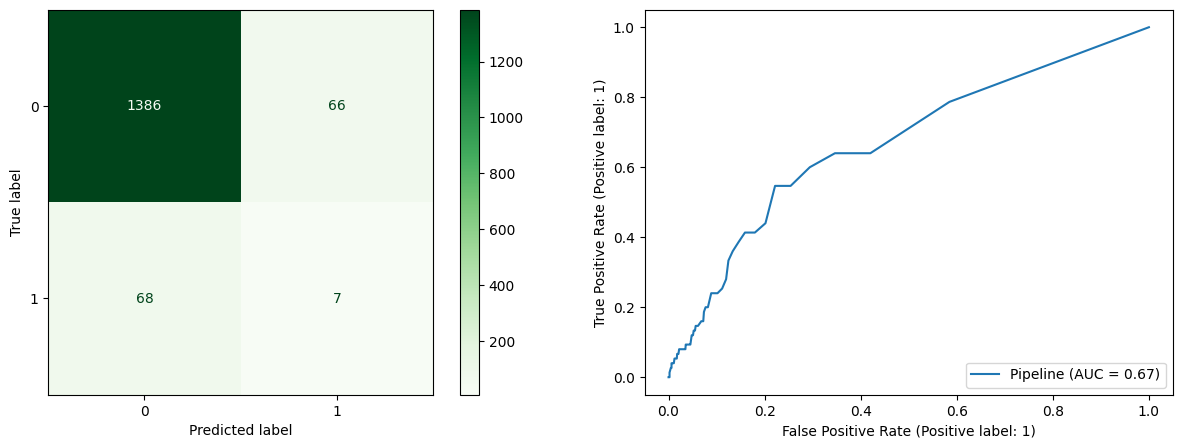

In [ ]:
probability_report_matrix(rf_pca_pipe, X2_train, y2_train, label='PCA Random Forest Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(rf_pca_pipe, X2_test, y2_test, label='PCA Random Forest Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

- Tuned Random Forest PCA

In [ ]:
rf_params = {'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample'],
            'randomforestclassifier__max_depth': [None, 5, 10, 15],
            'randomforestclassifier__n_estimators': [50, 100, 150, 200]}

In [ ]:
rf_pca_pipe_gs = GridSearchCV(rf_pca_pipe, rf_params, scoring='f1')
 
rf_pca_pipe_gs.fit(X2_train, y2_train)
print('Best Random Forest PCA Parameters:')
print(rf_pca_pipe_gs.best_params_)
best_rf_pca_pipe = rf_pca_pipe_gs.best_estimator_
print(f'Accuracy of best Random Forest model is: {best_rf_pca_pipe.score(X2_test, y2_test)}')

Best Random Forest PCA Parameters:
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 150}
Accuracy of best Random Forest model is: 0.796332678454486


In [ ]:
tuned_rf_pca = RandomForestClassifier(class_weight='balanced_subsample', max_depth=5, n_estimators=100)

tuned_rf_pca_pipe = make_pipeline(preprocessor, pca17, tuned_rf_pca)
tuned_rf_pca_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23190>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8bdb23040>)])),
                ('pca', PCA(n_components=17)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: PCA Random Forest Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3386
           1       0.19      0.75      0.30       174

    accuracy                           0.83      3560
   macro avg       0.59      0.79      0.60      3560
weighted avg       0.95      0.83      0.87      3560

This code was taken from Coding Dojo Code Along


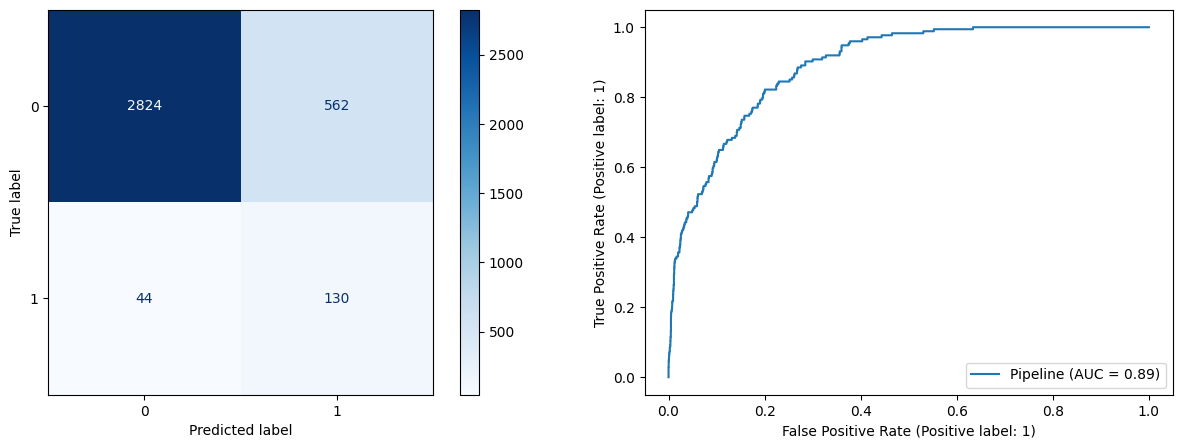

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: PCA Random Forest Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.41      0.58      1452
           1       0.07      0.84      0.13        75

    accuracy                           0.43      1527
   macro avg       0.52      0.63      0.35      1527
weighted avg       0.94      0.43      0.56      1527

This code was taken from Coding Dojo Code Along


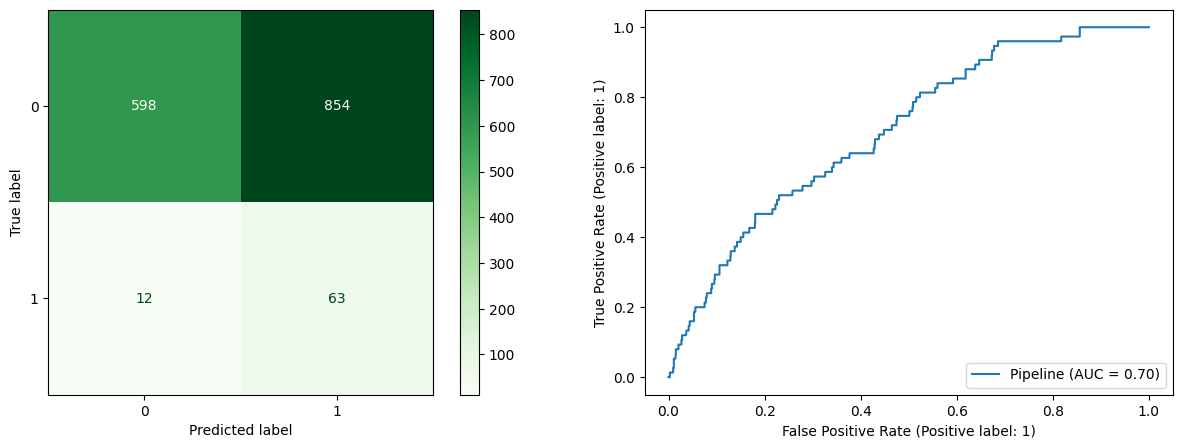

In [ ]:
probability_report_matrix(tuned_rf_pca_pipe, X2_train, y2_train, label='PCA Random Forest Train Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Blues', thresh=.5)

probability_report_matrix(tuned_rf_pca_pipe, X2_test, y2_test, label='PCA Random Forest Test Data', 
                             figsize=(15,5), normalize= None,
                             cmap='Greens', thresh=.3)

# Best Overall Model

- The best model overall is Tuned Random Forest using Feature Engineering and PCA

- Recall is at 84% 